In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sklt
import seaborn as sns

#Import for Normality testing
from scipy.stats import shapiro

#Other Stats Testing
from scipy import stats
from scipy.stats import chi2_contingency, mannwhitneyu, ttest_ind
import warnings
warnings.filterwarnings('ignore')

In [2]:
data =  pd.read_csv('earthquake_data_tsunami.csv')
data.head(5)  #Get a glipse of the data

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [3]:
print("Dataset Shape:", data.shape)
print("\\nFirst few rows:")
print(data.head())
print("\\nData Info:")
print(data.info())
print("\\nMissing Values:")
print(data.isnull().sum())
print("\\nBasic Statistics:")
print(data.describe())

Dataset Shape: (782, 13)
\nFirst few rows:
   magnitude  cdi  mmi  sig  nst   dmin   gap    depth  latitude  longitude  \
0        7.0    8    7  768  117  0.509  17.0   14.000   -9.7963    159.596   
1        6.9    4    4  735   99  2.229  34.0   25.000   -4.9559    100.738   
2        7.0    3    3  755  147  3.125  18.0  579.000  -20.0508   -178.346   
3        7.3    5    5  833  149  1.865  21.0   37.000  -19.2918   -172.129   
4        6.6    0    2  670  131  4.998  27.0  624.464  -25.5948    178.278   

   Year  Month  tsunami  
0  2022     11        1  
1  2022     11        0  
2  2022     11        1  
3  2022     11        1  
4  2022     11        1  
\nData Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig

In [4]:
data.dtypes

magnitude    float64
cdi            int64
mmi            int64
sig            int64
nst            int64
dmin         float64
gap          float64
depth        float64
latitude     float64
longitude    float64
Year           int64
Month          int64
tsunami        int64
dtype: object

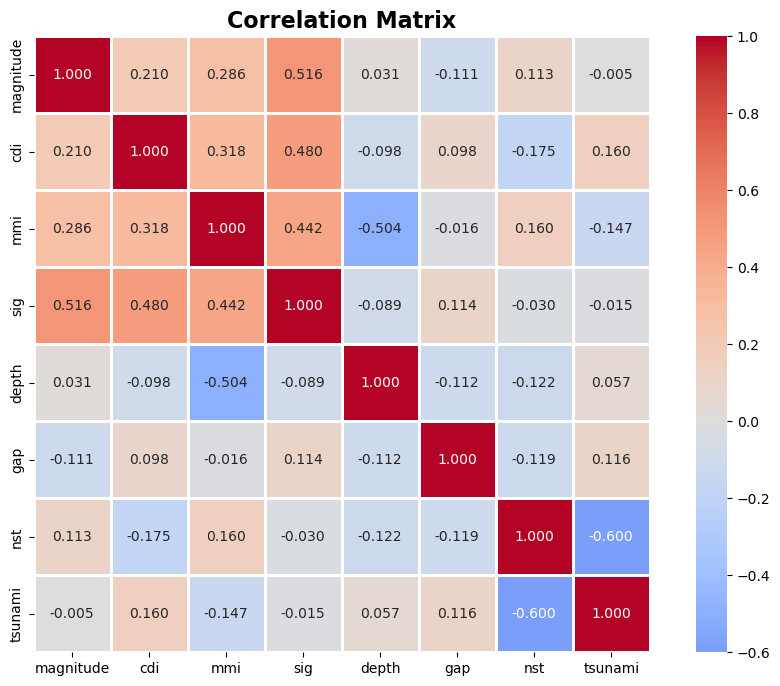

In [5]:
plt.figure(figsize=(12, 8))
correlation = data[['magnitude', 'cdi', 'mmi', 'sig', 'depth','gap','nst','tsunami']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.3f')
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

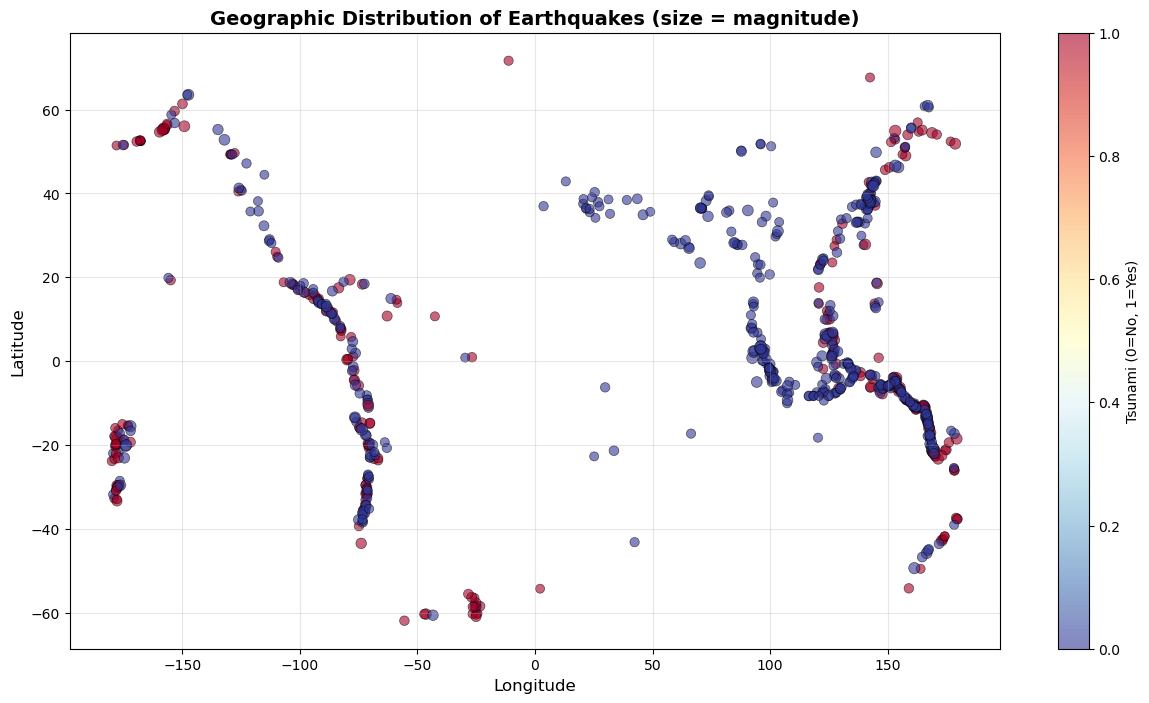

In [6]:
plt.figure(figsize=(15, 8))
scatter = plt.scatter(data['longitude'], data['latitude'], 
                     c=data['tsunami'], cmap='RdYlBu_r',
                     s=data['magnitude']**2, alpha=0.6, edgecolors='black', linewidth=0.5)
plt.colorbar(scatter, label='Tsunami (0=No, 1=Yes)')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('Geographic Distribution of Earthquakes (size = magnitude)', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

In [7]:
#Let's take a look
statistic, p_value = shapiro(data[0:782])
print(f"Shapiro-Wilk Test Statistic: {statistic:.3f}")
print(f"P-value: {p_value:.3f}")

#Our p-value is less than or equal to 0.05: We reject the null hypothesis
#concluding that the data is likely not from a normal distribution.

Shapiro-Wilk Test Statistic: 0.516
P-value: 0.000


In [8]:
#Mann Test
tsunami_mag = data[data['tsunami'] == 1]['magnitude']
no_tsunami_mag = data[data['tsunami'] == 0]['magnitude']

statistic, p_value = mannwhitneyu(tsunami_mag, no_tsunami_mag, alternative='two-sided')
print("\\n1. Mann-Whitney U Test: Magnitude vs Tsunami")
print(f"   Statistic: {statistic:.4f}")
print(f"   P-value: {p_value:.6f}")
print(f"   Result: {'Significant difference' if p_value < 0.05 else 'No significant difference'} (α=0.05)")
print(f"   Median magnitude (tsunami): {tsunami_mag.median():.2f}")
print(f"   Median magnitude (no tsunami): {no_tsunami_mag.median():.2f}")

\n1. Mann-Whitney U Test: Magnitude vs Tsunami
   Statistic: 73919.5000
   P-value: 0.679800
   Result: No significant difference (α=0.05)
   Median magnitude (tsunami): 6.80
   Median magnitude (no tsunami): 6.80


In [11]:
#T-Test
tsunami_depth = data[data['tsunami'] == 1]['depth']
no_tsunami_depth = data[data['tsunami'] == 0]['depth']

statistic, p_value = ttest_ind(tsunami_depth, no_tsunami_depth)
print("Independent T-Test: Depth vs Tsunami")
print(f"   Statistic: {statistic:.4f}")
print(f"   P-value: {p_value:.6f}")
print(f"   Result: {'Significant difference' if p_value < 0.05 else 'No significant difference'} (α=0.05)")
print(f"   Mean depth (tsunami): {tsunami_depth.mean():.2f} km")
print(f"   Mean depth (no tsunami): {no_tsunami_depth.mean():.2f} km")

Independent T-Test: Depth vs Tsunami
   Statistic: 1.5893
   P-value: 0.112397
   Result: No significant difference (α=0.05)
   Mean depth (tsunami): 85.66 km
   Mean depth (no tsunami): 69.67 km


In [18]:
data['depth'] = data['depth'].astype('int64')

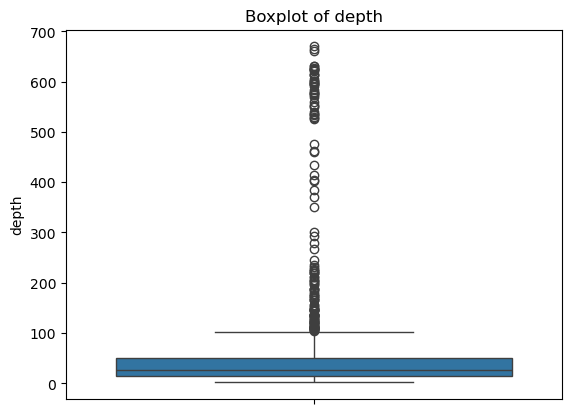

In [22]:
depth = data['depth']

sns.boxplot(depth)
plt.title('Boxplot of depth')
plt.show()

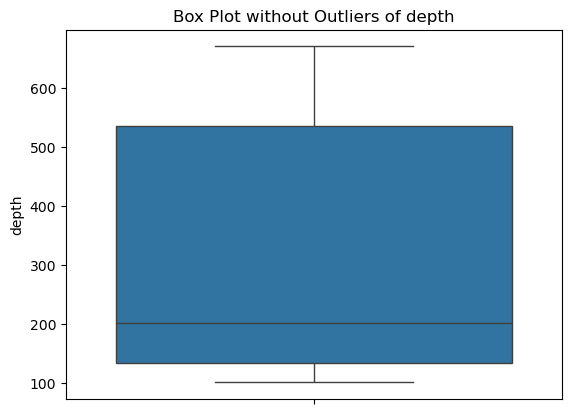

In [25]:
def remove_box(df, column, threshold):
    removed_outliers = df[df[column] >= threshold]  #Our outliers are above 100

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers
no_outliers = remove_box(data, 'depth', 100)